# A VIEW OF  WHAT WE ARE GOING TO COVER:

1. An End-end sci-kit Learn workflow.
2. Choose the right estimator or algorithm for our problem.
3. Fit the Model/Algorithm and use it to make predictions on our data.
4. Evaluating a Model.
5. Improve a Model.
6. Save and Load a Trained Model.
7. Putting it all together.

## Getting Our Data Ready to be Used by ML.

In [1]:
#get the data
import pandas as pd
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X  (Feature Matrix)

x = heart_disease.drop("target", axis=1) # all the columns excep target.

# create y (label)
y = heart_disease["target"]

In [3]:
#import numpy as np

## Choose the rght algorithm for your problem

This is a classification problem so we use `ensemble` Methods on `RandomForestClassifier`

In [4]:
#Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier()

# we keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Fit the Model/Algorithm and use it to make predictions on our data.

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [6]:
clf.fit(x_train,y_train)  #fit the model to learn new patterns

RandomForestClassifier()

In [7]:
### Make Prediction
### You can only make prediction with data that has same array.

y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

## Evaluating a Model.

In [8]:
clf.score(x_train,y_train) #Train score

1.0

In [9]:
clf.score(x_test,y_test) #Test score , it does learned well about the data

0.7868852459016393

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
print(classification_report(y_test,y_pred)) #Compare the y_test and the prediction labels.

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        24
           1       0.85      0.78      0.82        37

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [12]:
confusion_matrix(y_pred,y_pred) #Compare the y_test and the prediction labels.

array([[27,  0],
       [ 0, 34]], dtype=int64)

In [13]:
accuracy_score(y_test,y_pred) #Compare the y_test and the prediction labels.

0.7868852459016393

In [14]:
## All  the above return same range of scoress. 
## So lets Improve the model.

In [15]:
import numpy as np

## Improve a Model.

In [16]:
### Try different amount of n_estimators/algorithm

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying Model with {i} estimator..")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model Accuracy on test set:{clf.score(x_test,y_test)*100:.2f}%")
    print(" ")

Trying Model with 10 estimator..
Model Accuracy on test set:83.61%
 
Trying Model with 20 estimator..
Model Accuracy on test set:81.97%
 
Trying Model with 30 estimator..
Model Accuracy on test set:83.61%
 
Trying Model with 40 estimator..
Model Accuracy on test set:83.61%
 
Trying Model with 50 estimator..
Model Accuracy on test set:81.97%
 
Trying Model with 60 estimator..
Model Accuracy on test set:80.33%
 
Trying Model with 70 estimator..
Model Accuracy on test set:80.33%
 
Trying Model with 80 estimator..
Model Accuracy on test set:81.97%
 
Trying Model with 90 estimator..
Model Accuracy on test set:80.33%
 


## Save model and Load it.

In [17]:
import pickle

#pickle.dump(clf,open("Model/random_forest_model_1.pkl","wb")) # wb-web binary

In [18]:
load_model =  pickle.load(open("Model/random_forest_model_1.pkl", "rb")) #read binary
load_model.score(x_test,y_test)

0.9016393442622951

# GOING THROUGH THE ABOVE STEPS IN DETAILS 

BREAKING DOWN THE STEPS ABOVE.

## Getting Our Data Ready to be used by Machine Learning.

 1. Spli the data into Features and Labels(Usually `X` and `Y`)
 2. Filling (also called inputing) or disgarding missing values.
 3. Converting non-numericals to numerical values (also call feature encoding)

In [19]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
#features
x = heart_disease.drop(["target"], axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
#labels
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
## Splitting the data into train set ans test set

from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [23]:
x_train.shape,x_test.shape,y_train.shape,x_test.shape

((212, 13), (91, 13), (212,), (91, 13))



### Converting non-numericals to numericals
 the data set above is Numerical already so lets import another one

In [24]:
car_sales = pd.read_csv("Data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [28]:
# split the data
x = car_sales.drop(["Price"],axis=1)
y = car_sales["Price"]

#splitting into train set and test set

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [26]:
## Build a Machine learnig model to make prediction
## the regressor can predict numbers

from sklearn.ensemble import RandomForestRegressor

model =  RandomForestRegressor()

model.fit(x_train,y_train)
model.score(x_test,y_test)

#code wont run be machine model only understand numbers, see code below.

ValueError: could not convert string to float: 'Toyota'

### Turn Category to numbers
The `Doors` Column is included because 4,5,7 are categorised.

In [29]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")


tranformer_x = tranformer.fit_transform(x)

tranformer_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
## put it into a data set
pd.DataFrame(tranformer_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


### Anothe way to turn non-numericals to numericals

In [ ]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

In [31]:
## NOW, let's refit our model above with the numerical (transformer_x)
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(tranformer_x,y,test_size=0.2)

model.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
model.score(x_test,y_test)

0.3235867221569877

### Removing missing values

 1.fill in the missing values(inputution)
 2.remove the missing values all together.

In [33]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [34]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
#### Fill missing values 

car_sales_missing["Make"].fillna("missing",inplace=True) #make
car_sales_missing["Colour"].fillna("missing",inplace=True) #colour
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)
car_sales_missing["Doors"].fillna(4,inplace=True)

In [36]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
#Remove the remaining mssing values in Price
car_sales_missing.dropna(inplace=True)

In [38]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [39]:
## Split the data

x  = car_sales_missing.drop(["Price"],axis=1)
y  = car_sales_missing["Price"]

In [40]:
## NB.OneHotEncoder class was upgraded to be able to handle None & NaN values.
## So the code below will run without an error.
## for the seek of practice the NaN values where removed.

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
tranformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

## Transform the car_sales_missing to Numericals
tranformer_x = tranformer.fit_transform(car_sales_missing)

tranformer_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2: Removing and filling missing values with sklearn.

In [41]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [42]:
# Check missing values
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

The data is split into train and test before any filling missing values or transformations take place.

In [44]:
from sklearn.model_selection import train_test_split

# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [45]:
# Check missing values
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [46]:
#note:the missing values in the labels are already droped so we are dealing with the missing values in the labels only.

# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test) # tranform takes the imputing missing values from the training set and fills the test set with them

# Check filled X_train
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

Now we've filled our missing values, let's check how many are missing from each set.

In [47]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [48]:
# Check missing data in test set
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

No more missing values!

Okay, no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding.

Again, keeping our training and test data separate.

In [49]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now let's one hot encode the features with the same code as before 
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform the training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transform the test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

Fit a model

Wonderful! Now we've filled and transformed our data, ensuring the training and test sets have been kept separate. Let's fit a model to the training set and evaluate it on the test set.

In [50]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Setup model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.21229043336119102

the model above performed poor to the previous one because the dataset is small let's see below

In [51]:
#campere the lenth of the two dataset used.
len(car_sales_missing),len(car_sales)

(950, 1000)

## Choose the Right Estimator/Algorithm for your problem

> SOME THINGS TO NOTE:

> 1.SKLEARN REFERS TO MACHINE LEARNING MODEL, ALGORITHMS AS ESTIMATORS

> 2.CLASSIFICATION PROBLEM PREDICTING A CATEGORY(HEART DISEASES OR NOT)

> 3.SOMETIMES YOU'LL SEE `clf`(SHORT FOR CLASSIFIER) USED FOR CLASSIFICATION ESTIMATOR

> 4.REGRESSION PREBLOM PREDICTING A NUMBER (SELLING PRICE OF A CAR)


###  Regression. Problem

IF YOUR NOT SURE ABOUT WHAT MODEL YOU SHOULD USE THEN LOOK AT THE ML MAP. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [52]:
### Get california dataset

from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing


## the data contains the numerical values
## the feature_names contains the attributes 
## the target values has an attribute  target_names:["MedHouseVal"]

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [53]:
## we are tying to predict the features_names againts the target which has an  target_names['MedHouseVal']
## Lets put the dataset into a DataFrame.#


housing_df = pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [54]:
## Lets add the target values to it attribute MedHouseVal in the df above

housing_df['MedHouseVal'] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
## lets rename the column back to target

housing_df['Target'] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [56]:
## Drop the previous column
housing_df = housing_df.drop(["MedHouseVal"], axis=1)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [57]:
#Import Algorithm/Estimator
from sklearn.linear_model import Ridge

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  housing_df.drop(["Target"], axis=1)
y = housing_df["Target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = Ridge()
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)

0.5758549611440128

WHAT IF `Ridge` DIDNT WORK OR THE SCORE DIDNT FIT OUR NEED'S

WELL, WE COULD ALWAYS TRY A DIFFERENT MODEL...

HOW ABOUT `ensemble Model`( AN ENSEMBLE MODEL IS A COMBINATION OF SMALLER MODELS TO TRY AND MAKE BETTER PREDCITION THAN JUST A SINGLE MODEL.)

SKLEARN ENSEMBLE MODEL CAN BE FOUND HERE: https://scikit-learn.org/stable/modules/ensemble.html

In [58]:
#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestRegressor

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  housing_df.drop(["Target"], axis=1)
y = housing_df["Target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestRegressor()
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)


### that's diffinetely the best score.. 
### 100 smaller estimators run through 
### the score is 80% which is much more better.

0.8065734772187598

### Classification problem

LET'S LOOK AT THE MAP https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

The Map says we should try Support Vector Manchines `SVMs`

In [59]:
### get the data

heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [60]:
## import the algorithm
from sklearn.svm import LinearSVC

##Set Random seed()
np.random.seed()

## Make Data
x =  heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the Data
x_train,x_test,y_train,y_test,= train_test_split(x,y,test_size=0.2)

## instantiate and fit the model
modele =LinearSVC()
model.fit(x_train,y_train)

##Evaluate our LinearSVC
model.score(x_test,y_test)

0.5764387912087912

That's a Small Score Evaluation, So we will try an emsemble Method.

Things to Note:

1. structured Data (Regression/Classification Problem) Used `Ensemble` Methods they Perform Better.
2. Unstructured Data used Deep learning or Transfer Learning. 

In [61]:
#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestClassifier

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestClassifier()
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)

## Once Again we can see that the Ensemble Methods perform better on Structured data.

0.8524590163934426

## Fit the Model/Algorithm into Our Data and use it to make prediction.

### Fitting the model.

Names for :
* `x`: Features, Feature Variables, Data
* `y`: Labels, Target Variables, Target

In [62]:
#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestClassifier

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestClassifier()

#FITTING THHE MODEL(Trainnning our Model)
model.fit(x_train,y_train)


#Check the score of the model (on the test set)
model.score(x_test,y_test)

0.8524590163934426

### Make Prediction from the train model.

#### Prediction on Classification model

There are two ways to do this:

* `Predict()`
    
* `predict_proba()`


In [63]:
## When making Prediction the test_set must be in the same shape as the train set.  

x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [64]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [65]:
## Making Prediction
model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
### compare the prediction to the truth labels to evaluate the model.
### I.e,comparing the prediction to the origal test_set
y_pred = model.predict(x_test)
np.mean(y_pred==y_test)

0.8524590163934426

In [67]:
 ## another way
model.score(x_test,y_test)

0.8524590163934426

In [68]:
## another way
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.8524590163934426

FROM ABOVE IT CAN BE SEEN THAT 
THREE DIFFERENT WAYS RETURN SAME SCORE.

 `predict_proba()` returns the probabilities on Classification labes.

In [69]:
model.predict_proba(x_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

#### Making prediction on our regresion model

In [70]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
## Import the algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

## set the random seed()
np.random.seed()

## make the data
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

##split the data
## train_test_split is imported from sklearn.model_selection in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Instantiatec and fit the model
model =RandomForestRegressor()
model.fit(x_train,y_train)

#make prediction

y_pred = model.predict(x_test)

In [72]:
y_pred[:10]

array([4.8855774, 0.93366  , 3.0536606, 2.88319  , 3.0717802, 3.25007  ,
       1.9996001, 1.78708  , 1.96444  , 2.3650101])

In [73]:
np.array([y_test])

array([[5.00001, 0.619  , 2.523  , ..., 3.304  , 1.331  , 1.832  ]])

In [74]:
## comparing the prediction to it's true value
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred,y_test)

0.32765435312500024

## Evaluating Our Machine Leanrnig Model

THERE ARE THREE WAYS OF EVALUATING THE ML MODELS:
* Estimator built-in score() method
* The Scoring parameter
* The Problem specific  Metric functions

You can read more here. https://scikit-learn.org/stable/modules/model_evaluation.html

###  Estimator built-in score() method

In [ ]:
#### on CLASSIFICATION PROBLEM

#Import Algorithm/Estimator
from sklearn.ensemble import RandomForestClassifier

#Setup Random Seed()
np.random.seed(42)

#Create the Data 
x =  heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]


#Split into Train and test sets
#NB. Model selector is not imported because it has been used above in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


#Instantiate and fit the model(on the trianing set)
model = RandomForestClassifier()

#FITTING THHE MODEL(Trainnning our Model)
model.fit(x_train,y_train)


In [ ]:
## Checking the scores on train set
model.score(x_train,y_train)

In [ ]:
## checking the score on test set
model.score(x_test,y_test)

In [ ]:
## On a Regression Problem

## Import the algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

## set the random seed()
np.random.seed()

## make the data
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

##split the data
## train_test_split is imported from sklearn.model_selection in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Instantiatec and fit the model
model =RandomForestRegressor()
model.fit(x_train,y_train)

In [ ]:
## score on train set
model.score(x_train,y_train)

In [ ]:
## score on test set
model.score(x_test,y_test)

* `Dependent Variable`: The Dependent Variable is the `Target`, depending on the Features

* `Independent Variable`: The Independent Variable is are Feature, which are going to be predicted upon the target

The `test_set` is what matters most when deploying the model into an  application

 ### Evalaating a  model using the `Scoring` parameter (Coss Validation)
 
model_evaluation tool using the `Cross Validation`, which instead of picking the single score, it's split the training and test set into many `fold` and return the diiferent scores. you can find the find the mean of the cross validation to enable you get the score accuracy.

read here for more https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [75]:
### Importing the cross validation 
from sklearn.model_selection import cross_val_score

## Import the algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

## set the random seed()
np.random.seed()

## make the data
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

##split the data
## train_test_split is imported from sklearn.model_selection in ths notebook
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## Instantiatec and fit the model
model =RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [76]:
### the built-in score method
model.score(x_test,y_test)

0.8126232204295996

In [77]:
### Cross valiation
## the crass validation takes the model and the initial feature and labels and split into folds and return the scores
cross_val_score(model,x,y,cv=5)

array([0.51984206, 0.70364702, 0.74145943, 0.62134418, 0.68088146])

`THE IMAGE BELOW SHOWS HOW CROSS VALIDATION WORKS`

In [78]:
from IPython import display
display.Image("https://scikit-learn.org/stable/_images/grid_search_cross_validation.png") 

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [79]:
## lets incrase the number of split/folds to 10.
cross_val_score(model,x,y,cv=10)

array([0.2590884 , 0.68422467, 0.72727013, 0.69594293, 0.76915627,
       0.69581489, 0.49450202, 0.60548914, 0.4827666 , 0.7035055 ])

In [80]:
### lets comper with a single score validation

## set radom seed()
np.random.seed(42)

## single score  or built-in score evaluation

model_single_score = model.score(x_test,y_test)


##find the mean of cross valiadtion
model_cross_val = np.mean(cross_val_score(model,x,y,cv=5))


## compare the single score and the cross validation

model_single_score, model_cross_val

## if you are ask to get the accurate score. defo the cross val. mean accuracy will be best.

(0.8126232204295996, 0.6520824166120266)

### Evaluating a Classification model 

1.Accuracy 

2.Are unde ROC Curve

3.Confusion Metrix

4.Classification report


#### Accuracy

In [81]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


model = RandomForestClassifier()
cross_val_score = np.mean(cross_val_score(model,x,y,cv=5))
cross_val_score

0.8018032786885245

In [83]:
print(f"Heart Disease Classifier Cross Validation Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross Validation Accuracy: 80.18%


#### Area Under Curve(AUC) & Receiver operating characteristic curve (/ROC)

ROC Curve: ara comparison of a model true positive rate (tpr) versus a model false positive rate (fpr).

* True positive = model predict 1 when truth is 1
* False Positive = Model Predict 1 when truth is 0
* True Negative =  model predict 0 when truth is 0
* False Negative =  Model predict 0 when trus is 1

> NOTE:

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

* For more information on these metrics, bookmark the following resources and refer to them when you need:

* ROC and AUC, Clearly Explained! by StatQuest
 
* nROC documentation in Scikit-Learn (contains code examples)

* How the ROC curve and AUC are calculated by Google's Machine Learning team


**Receiver operating characteristic curve (/ROC)**

In [84]:
## import roc_curve
from sklearn.metrics import roc_curve

### mak the data
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)


## fit the model
model = RandomForestClassifier()
model.fit(x_train,y_train)

y_pred = model.predict_proba(x_test)
y_pred[:10]

array([[0.11, 0.89],
       [0.53, 0.47],
       [0.09, 0.91],
       [0.39, 0.61],
       [0.23, 0.77],
       [0.01, 0.99],
       [0.61, 0.39],
       [0.45, 0.55],
       [0.11, 0.89],
       [0.87, 0.13]])

In [85]:
### Now lets get the true positive 
## this will return on the floats on the rigth which are the true positive 

y_prob_positive  =y_pred[:,1]
y_prob_positive[:10]

array([0.89, 0.47, 0.91, 0.61, 0.77, 0.99, 0.39, 0.55, 0.89, 0.13])

In [86]:
### calculate the fpr,tpr and threshold

fpr,tpr,threshold = roc_curve(y_test,y_prob_positive)

fpr

array([0.     , 0.03125, 0.03125, 0.03125, 0.03125, 0.03125, 0.0625 ,
       0.09375, 0.15625, 0.15625, 0.1875 , 0.1875 , 0.21875, 0.21875,
       0.3125 , 0.34375, 0.34375, 0.40625, 0.59375, 0.65625, 0.75   ,
       0.9375 , 1.     ])

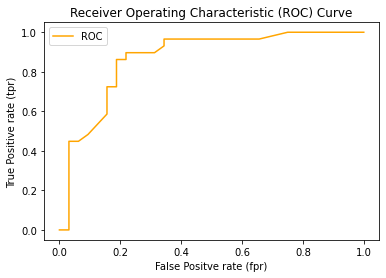

In [87]:
import matplotlib.pyplot as plt

### Creating a Function to plot a ROC Curve.

def plot_roc_curve(fpr,tpr):
    """
    plot a roc curve giving the false positive rate(fpr) and true positive rate(tpr) of a giving model 
    """
    ### plot the roc curve
    plt.plot(fpr,tpr, color="orange", label="ROC")
    
    ### Plot line with no predictive power (baseline)
    #plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    
    ##plot style
    plt.xlabel("False Positve rate (fpr)")
    plt.ylabel("True Positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr,tpr)
    

**Area Under Curve(AUC)**

In [88]:
## that Area under the curve for the plot above.
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob_positive)

0.8679956896551724

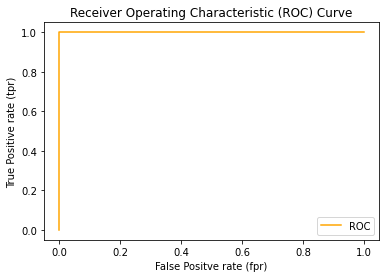

In [89]:
##Plot the perfect curve
fpr,tpr,threshold =  roc_curve(y_test,y_test)

plot_roc_curve(fpr,tpr)

## this is how a perfect curve looks like. 
#Not possible

In [90]:
## Evaluating the Curve above with AUC.

roc_auc_score(y_test,y_test)

1.0

#### Confusion Metrix

confusion metrix is a quick way to compare the lables a model predicts and the actually lables it was supposed to predict,
in essence giving you an idea of where the model got confused.

In [91]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)

confusion_matrix(y_test,y_pred)

array([[24,  8],
       [ 3, 26]], dtype=int64)

In [92]:
### plot the above on a Crosstab to Visalize properly

pd.crosstab(y_test,
           y_pred,
           rownames=["Actual Labels"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,8
1,3,26


**Creating a Confusion matrix using Sklearn**

Reading more here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

* You can either used `from_estimator` or `from_predictions`.

`from_estimator`: takes the model, feature(x) & lable(y)

`from_predictions`: takes the y_true(y_test) and the prediction y_pred

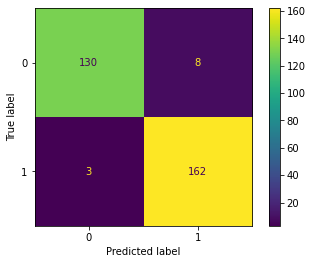

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay


##from_estimator
ConfusionMatrixDisplay.from_estimator(model,x,y)

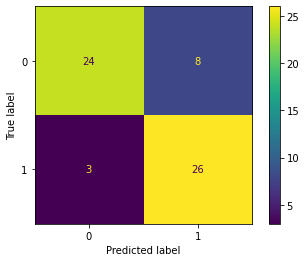

In [94]:
##from_prediction

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

#### Classification report 

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [96]:
### Where classification metrix becomes useful.

disease_true = np.zeros(1000) #1k people 

disease_true[0] = 1 # first index has a the disease

disease_predict = np.zeros(1000) # model has learn everthing about the data

## Now, Using the classification report to find the 1 tru value

pd.DataFrame(classification_report(disease_true,
                                   disease_predict,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


 `Accuracy`: Is a good measure to start with all classes are balanced.(e.g same number of sample)
 
 `precision`and `recal` becomes more important if all classes are imbalanced
 
  if false position predictions are worse than false negative, aim for higher precison
  
  if false negative predictions are worse than false positive, aim for higher recall
  
  `F1-score`: is a combination of precision and recall
  

### Evaluating a Regression Model 

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

**The Onces we are going to cover:**

1.R Square/Adjusted R Square/Coefficient of determination

3.Mean Absolute Error(MAE)

4.Mean Square Error(MSE)/Root Mean Square Error(RMSE)


#### R2 Square or Coefficient of determination

what R-squared does: compares your model prediction to the mean of the target. values can range from negative infinity(a very poor model) to 1. for exmaple if all your model does is predict the mean of the target, it R^2 will be 0.0, And if your model perfectly predict a range of numbers it R^2, will be 1.

In [97]:
from sklearn.ensemble import RandomForestRegressor

x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

np.random.seed(42)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
#Coefficient of determination
model.score(x_test,y_test)

0.8065734772187598

In [99]:
y_test.mean()

2.0550030959302275

In [100]:
from sklearn.metrics import r2_score

## fill in the array with y_test_mean()

y_test_mean = np.full(len(y_test),y_test.mean())

y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [101]:
r2_score(y_test,y_test_mean) #inperfect prediction (predicting the mean of the target)

0.0

In [102]:
r2_score(y_true=y_test,y_pred=y_test) #Perfect prediction

1.0

#### Mean Absolute Error (MAE)

MAE is the average of absolute difference between prediction and actula values.
It's gives you an idea of how Wrong your predictions are.

In [103]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x_test)

mae =mean_absolute_error(y_test,y_pred)
mae

0.32659871732073664

In [104]:
## let put the above field in a dataframe and find the mae again by hand

df = pd.DataFrame({"Actual value": y_test,
             "Predicted value": y_pred})

df["difference"] = df["Actual value"] - df["Predicted value"]

df

,Actual value,Predicted value,difference
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.543160,-0.357160
9814,2.78000,2.331760,0.448240
...,...,...,...
15362,2.63300,2.220380,0.412620
16623,2.66800,1.947760,0.720240
18086,5.00001,4.836378,0.163632
2144,0.72300,0.717820,0.005180


In [105]:
## this does not ingnore the Negative 
df["difference"].mean()

-0.012048392126937535

In [106]:
## MAE ingnores the negative
np.abs(df["difference"]).mean()

## we still go the same value 

0.32659871732073803

#### Mean Squared Error (MSE)

This the mean of the square of the errors between the actual values and predicted values 

In [107]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_test)

mean_squared_error(y_test,y_pred)

0.2534678520824551

In [108]:
###  let put the above field in a dataframe and find the mse again by hand
df["squared_difference"] = np.square(df["difference"])
df.head()

,Actual value,Predicted value,difference,squared_difference
20046,0.47700,0.493840,-0.016840,0.000284
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.543160,-0.357160,0.127563
9814,2.78000,2.331760,0.448240,0.200919


In [109]:
square = np.square(df["difference"])

square.mean()

0.25346785208245565

In [110]:
## Now, let's make a copy of the DF,Manipulate the data and see the average on the squared_difference
df_large=  df.copy()

df_large.iloc[1:100] = 20
df_large

,Actual value,Predicted value,difference,squared_difference
20046,0.47700,0.493840,-0.016840,0.000284
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [111]:
df_large["squared_difference"].mean()

0.7295421709146266

### Which Evaluation metric should be used for Classification and Regression Problem


**Evaluating the results of a machine learning model is as important as building one**.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

**Classification Model Evaluation Metrics/Techniques**

`Accuracy` - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

`Precision` - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

`Recall` - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

`F1 score` - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

`Confusion matrix` - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

`Cross-validation` - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

`Classification report` - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

`ROC Curve` - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

`Area Under Curve (AUC) Score` - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use**?

`Accuracy` is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

`Precision and recall` become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

`F1-score` is a combination of precision and recall.

`A confusion matrix` is always a good way to visualize how a classification model is going.


**Regression Model Evaluation Metrics/Techniques**

`R^2 (pronounced r-squared) or the coefficient of determination` - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

`Mean absolute error (MAE)` - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

`Mean squared error (MSE)` - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

**Which regression metric should you use**?

`R2 is similar to accuracy`. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

`MAE` gives a better indication of how far off each of your model's predictions are on average.

`As for MAE or MSE`, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

`Pay more attention to MAE`: When being 10,000 dollers off is twice as bad as being 5,000 dollers off.

`Pay more attention to MSE`: When being 10,000 doller off is more than twice as bad as being 5,000 doller off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

### Finally Evaluating a model using `Scroing Parameters` 



#### Classification Problem

In [113]:
### Import Cross validation metrices and estimator
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#set the random seed()
np.random.seed(42)

x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]


model = RandomForestClassifier()

**Cross Validated Accuracy**~

In [114]:
np.random.seed(42)

cv_acc = cross_val_score(model,x,y,cv=5,scoring=None) #If None, the estimator’s default scorer (Accuracy) is used.

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [115]:
### Cross Validated Accuracy mean average

print(f"The Cross Validated Accuracy is:{np.mean(cv_acc)*100:.2f}%")

The Cross Validated Accuracy is:82.48%


In [116]:
### now, Let's check to see if the scoring parameter is Accuracy, which is the estimator’s default scorer
np.random.seed(42)

cv_acc = cross_val_score(model,x,y,cv=5,scoring="accuracy")  

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [117]:
### Cross Validated Accuracy mean average

print(f"The Cross Validated Accuracy is:{np.mean(cv_acc)*100:.2f}%")


# we can see the scoring parameter is accuracy, whenever it is set to NONE.

The Cross Validated Accuracy is:82.48%


**Cross Validated Precision**

In [118]:
## set
np.random.seed(42)

cv_precision = cross_val_score(model,x,y,cv=5,scoring="precision")  

cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [119]:
##Cross Validated precision mean average
print(f"The Cross Validated Precision is:{np.mean(cv_precision)}")

The Cross Validated Precision is:0.8329547346025924


**Cross Validated recall**

In [120]:
np.random.seed(42)

cv_recall = cross_val_score(model,x,y,cv=5,scoring="recall")  

cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [121]:
##Cross Validated recall mean average
print(f"The Cross Validated recall is:{np.mean(cv_recall)}")

The Cross Validated recall is:0.8545454545454545


#### Regression Problem

In [122]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

#random seed(42)
np.random.seed()
#
#make my data
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

##instantiate my model
model = RandomForestRegressor()

**Cross validated R2 Square or Coefficient of determination**

In [123]:
np.random.seed(42)

cv_r2 = cross_val_score(model,x,y,cv=3,scoring=None)  # #If None, the estimator’s default scorer (R2 Square) is used.

cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [124]:
##Cross validated R2 Square  average mean
print(f"The Cross Validated R2 Square is: {np.mean(cv_r2)}")

The Cross Validated R2 Square is: 0.6545458023124507


**Cross Validated MSE**

In [125]:
## Here what you need to note is the Lower the value the better the model.

np.random.seed(42)

cv_mse = cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")  
cv_mse

array([-0.51906271, -0.34789469, -0.37117373, -0.4500546 , -0.46274716])

In [126]:
##Cross validated Mse average mean
print(f"The Cross Validated R2 Square is: {np.mean(cv_mse)}")

The Cross Validated R2 Square is: -0.4301865790173885


**Cross Validated mae**

In [127]:
## Here what you need to note is the Lower the value the better the model.

np.random.seed(42)

cv_mae = cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")  
cv_mae 

array([-0.54256026, -0.40902123, -0.43706982, -0.46918522, -0.47318856])

In [128]:
##Cross validated Mae average mean
print(f"The Cross Validated R2 Square is: {np.mean(cv_mse)}")

The Cross Validated R2 Square is: -0.4301865790173885


###  Uisng Different Evaluation metrics as scikit learn functions 

This is the third way to evaluate a machine learning model using the `Scikit learn model`
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

#### Classifiction problem

In [129]:
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# craate x & y
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

## create model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## fit model
model = RandomForestClassifier()
model.fit(x_train,y_train)


#make prediction
y_pred = model.predict(x_test)


## Evaluate model usinf evaluation fucntion
print(f"Accuracy: {accuracy_score(y_test,y_pred)*100:.2f}%")
print(f"precision: {precision_score(y_test,y_pred):.2f}")
print(f"recall: {recall_score(y_test,y_pred):.2f}")
print(f"f1_score: {f1_score(y_test,y_pred):.2f}")

Accuracy: 85.25%
precision: 0.85
recall: 0.88
f1_score: 0.86


#### Regression problem

In [130]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

#create x & y
x = housing_df.drop("Target",axis=1)
y = housing_df["Target"]

## create model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

## fit model
model = RandomForestRegressor()
model.fit(x_train,y_train)


#make prediction
y_pred = model.predict(x_test)


## Evaluate model usinf evaluation fucntion
print(f"R2_score: {r2_score(y_test,y_pred):.2f}")
print(f"Mean_absolute_error: {mean_absolute_error(y_test,y_pred):.2f}")
print(f"Mean_square_error: {mean_squared_error(y_test,y_pred):.2f}")


R2_score: 0.81
Mean_absolute_error: 0.33
Mean_square_error: 0.25


The differece betweent this Evaluation scores and the cross validation is that this scorers are run on one estimatior 
while the cross validation return the average on different estimatiors

## Improving our model

firt prediction =  baseline predictions

first models = baseline model

Prediction prespertive:
* Could we collect more data(Generally the more the data the better)
* Could we improve our data

Model persperctive:
* Is there a better model we can use?
* could we improve our current model?


Parameters vs Hyperparameters

* Parameters = Model find this pattern in our data
* Hyperparameters = Settings on a model you can adjust to (potentially) improve its ability to find patterns.  

### Three ways we can improve our Hyperparameters Tuning 

* By hand.
* Randomly with RandomSearchCV
* Exhaustively with GridSearchCV.

In [131]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier()

In [132]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}